# AirBnB Analysis

### Import Packages

In [19]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

### Question 1: Import Data

Load the two datasets (**listings.csv** and **reviews.csv**) into pandas data frames: **listings** and **reviews**. <br>
Display the size, column headings, and first and last five rows from each dataset.

In [20]:
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

In [21]:
# 'listings' Dimensions (size)
listings.shape

(7858, 17)

In [22]:
# 'reviews' Dimensions (size)
reviews.shape

(251066, 13)

listings: 7858 rows (observations), 17 columns (variables) <br>
reviews: 251066 rows (observations), 13 columns (variables)

In [23]:
# 'listings' Column headings
list(listings.columns)

['listing_url',
 'name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_is_superhost',
 'neighbourhood',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price']

In [24]:
# 'reviews' Column headings
list(reviews.columns)

['listing_id',
 'id',
 'date',
 'reviewer_id',
 'reviewer_name',
 'review_score_rating',
 'review_scores_accuracy',
 'review_score_cleanliness',
 'review_score_checkin',
 'review_score_communication',
 'review_score_location',
 'review_score_value',
 'comments']

In [25]:
# 'listings' first 5 rows
listings.head()

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price
0,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,Teresa,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,2,NaN,1.0,2.0,"[""Shower gel"", ""Freezer"", ""Private backyard \u...",78.0
1,https://www.airbnb.com/rooms/3592153,Victorian House 4 Bed City Centre Ballsbridge D4,Enjoy staying in a large house in the center o...,Our neighbourhood is in one of the best locati...,Conor,t,"Ballsbridge, Dublin, Ireland",Dublin City,53.33219,-6.22718,Entire home/apt,8,NaN,4.0,4.0,"[""Luggage dropoff allowed"", ""Private backyard ...",1186.0
2,https://www.airbnb.com/rooms/3604420,"Self Catering Barge, Tig Beatha",Tig Beatha is a self catering cruising barge l...,NaN,Trish,f,NaN,Dublin City,53.34736,-6.22631,Entire home/apt,3,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Indoor firepla...",165.0
3,https://www.airbnb.com/rooms/3604440,Beautful Apt in Iconic Millenium Tower @ Dockl...,"This is a beautiful, bright, airy and spacious...",The Apt is located right in the heart of Dubli...,Kieran,t,"Ringsend, Dublin, Ireland",Dublin City,53.34407,-6.23630,Entire home/apt,6,NaN,3.0,3.0,"[""Hair dryer"", ""Refrigerator"", ""First aid kit""...",1219.0
4,https://www.airbnb.com/rooms/3622736,Beautiful House with Garden in City,Charming family house with beautiful garden on...,NaN,Katie,f,NaN,Dublin City,53.33605,-6.27914,Entire home/apt,4,NaN,3.0,3.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Free...",190.0


In [26]:
# 'listings' last 5 rows
listings.tail()

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price
7853,https://www.airbnb.com/rooms/2026810,2 single cosy rooms in Ranelagh,2 rooms in my house. 1 cosy single bedroom an...,Its just about the best place to live in Dubli...,Mary,f,"Ranelagh, Dublin, Ireland",Dublin City,53.32338,-6.25333,Private room,1,NaN,1.0,1.0,"[""Hair dryer"", ""Refrigerator"", ""Coffee"", ""Book...",54.0
7854,https://www.airbnb.com/rooms/2069629,"City Centre Apartment, sleeps 2",Location! Location! Location! You couldn't be ...,"Location, location, location! Bachelors Walk i...",Michelle,f,"North Lotts, Dublin 1, Ireland",Dublin City,53.34665,-6.26371,Entire home/apt,2,NaN,1.0,1.0,"[""Hair dryer"", ""Refrigerator"", ""Extra pillows ...",95.0
7855,https://www.airbnb.com/rooms/2084913,Ensuite luxury - Dublin city center,<b>The space</b><br />Very big double room wit...,NaN,Patricia,f,NaN,Dublin City,53.34932,-6.26709,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Elevator"", ""Heating"", ""Wa...",80.0
7856,https://www.airbnb.com/rooms/2121887,Great Penthouse In City Centre,The roof terrace is VERY large and is great fo...,Apartment is right beside St Stephens Green an...,Gareth,f,"Dublin, County Dublin, Ireland",Dublin City,53.33914,-6.26709,Entire home/apt,4,NaN,2.0,2.0,"[""Self check-in"", ""Smoking allowed"", ""Building...",70.0
7857,https://www.airbnb.com/rooms/2162973,Cosy Georgian independent flat in Ranelagh.,Colliers House is just off the main street in ...,Ranelagh is a very popular enclave in Dublin t...,Ali,f,"Dublin, Ireland",Dublin City,53.32147,-6.24967,Entire home/apt,2,NaN,1.0,1.0,"[""Shower gel"", ""Luggage dropoff allowed"", ""Pri...",125.0


In [27]:
# 'reviews' first 5 rows
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,review_score_rating,review_scores_accuracy,review_score_cleanliness,review_score_checkin,review_score_communication,review_score_location,review_score_value,comments
0,44077,203703,2011-03-20,393348,Christian,4.0,5.0,5.0,5.0,4.0,5.0,5.0,We enjoyed our stay very much. The room was co...
1,44077,211369,2011-03-28,444004,Solidea,4.0,4.0,4.0,5.0,4.0,3.0,5.0,We have been here 4 nights. Stay in a home is ...
2,44077,234215,2011-04-21,465058,Michael And Isabelle,4.0,4.0,5.0,4.0,4.0,4.0,4.0,Teresa and Hughie were great hosts. They were ...
3,44077,261843,2011-05-13,490005,Weston,5.0,4.0,4.0,4.0,5.0,5.0,5.0,"No surprises, was as described. Very gracious..."
4,44077,268148,2011-05-17,520460,Barbara,5.0,5.0,4.0,4.0,5.0,5.0,4.0,"Teresa was a lovely hostess, and we had a deli..."


In [28]:
# 'reviews' last 5 rows
reviews.tail()

,listing_id,id,date,reviewer_id,reviewer_name,review_score_rating,review_scores_accuracy,review_score_cleanliness,review_score_checkin,review_score_communication,review_score_location,review_score_value,comments
251061,2162973,454430030,2019-05-18,87665301,Kerry,5.0,5.0,5.0,5.0,5.0,4.0,4.0,"Once again, Ali and her mom were wonderful hos..."
251062,2162973,536629798,2019-09-27,291322795,Terna Erdoo,3.0,5.0,5.0,3.0,5.0,5.0,4.0,This is the place to be
251063,2162973,466397298846467107,2021-10-05,69716084,Lily,5.0,5.0,4.0,5.0,4.0,4.0,5.0,Alis place is absolutely perfect for a stay in...
251064,2162973,527409523280427039,2021-12-28,43619041,Jimmy,3.0,5.0,5.0,5.0,5.0,5.0,4.0,Ali's place could not be better located! It's ...
251065,2162973,667201957406399217,2022-07-09,359871881,Yiğit,5.0,5.0,4.0,5.0,5.0,4.0,5.0,Imagine the best host you can.. Ali is better!...


### Question 2: Tidy

**a)** Define a function to extract the id for an airbnb listing from the URL contained in the `listing_url` column in the dataset <br>
(Digits after last '/')<br>


In [29]:
#enumerate() allows you to iterate over a sequence (such as a list, tuple, or string) keeping track of index and of each element

def extract_id(url):
    url_list = []
    if(type(url) != str): # Must be string entered, otherwise NaN
        return np.NaN
    
    # We iterate through each character (element) and store its index (index)
    # Each element of a string is its characters
    else:
        for index, element in enumerate(url):
            if element.isdigit():
                url_list.append(element)
                
        # Convert each number to a string and join them
        result = ''.join(str(i) for i in url_list)
        result = int(result) # Convert back to int
        return result
        

In [30]:
extract_id("https://www.airbnb.com/rooms/2026810") # Test

2026810

In [31]:
type(extract_id("https://www.airbnb.com/rooms/2026810")) # It is of correct integer type

int

Extract ids from the listing_url column for each listing to add a new column called id. The pandas Series apply function used together with the extract_id function defined above can be used for this.

In [32]:
# .apply() allows us to use a function for each row of a specified column
listings['id'] = listings["listing_url"].apply(extract_id)
listings.head()

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id
0,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,Teresa,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,2,NaN,1.0,2.0,"[""Shower gel"", ""Freezer"", ""Private backyard \u...",78.0,44077
1,https://www.airbnb.com/rooms/3592153,Victorian House 4 Bed City Centre Ballsbridge D4,Enjoy staying in a large house in the center o...,Our neighbourhood is in one of the best locati...,Conor,t,"Ballsbridge, Dublin, Ireland",Dublin City,53.33219,-6.22718,Entire home/apt,8,NaN,4.0,4.0,"[""Luggage dropoff allowed"", ""Private backyard ...",1186.0,3592153
2,https://www.airbnb.com/rooms/3604420,"Self Catering Barge, Tig Beatha",Tig Beatha is a self catering cruising barge l...,NaN,Trish,f,NaN,Dublin City,53.34736,-6.22631,Entire home/apt,3,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Indoor firepla...",165.0,3604420
3,https://www.airbnb.com/rooms/3604440,Beautful Apt in Iconic Millenium Tower @ Dockl...,"This is a beautiful, bright, airy and spacious...",The Apt is located right in the heart of Dubli...,Kieran,t,"Ringsend, Dublin, Ireland",Dublin City,53.34407,-6.23630,Entire home/apt,6,NaN,3.0,3.0,"[""Hair dryer"", ""Refrigerator"", ""First aid kit""...",1219.0,3604440
4,https://www.airbnb.com/rooms/3622736,Beautiful House with Garden in City,Charming family house with beautiful garden on...,NaN,Katie,f,NaN,Dublin City,53.33605,-6.27914,Entire home/apt,4,NaN,3.0,3.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Free...",190.0,3622736


### Question 3: Simple Analysis

**a)** How many different hosts (`host_name`) are in the dataset?

In [33]:
# Extract elements of column "host_name" and store in list
host_names_list = listings["host_name"].tolist()
host_names_list

['Teresa',
 'Conor',
 'Trish',
 'Kieran',
 'Katie',
 'Cathy',
 'Ealáir',
 'Giustina',
 'Jo',
 'Anthony',
 'Max',
 'Laura',
 'Teresa',
 'Orla',
 'Brian',
 'Gill',
 'Teresa',
 'Rob',
 'Annmarie',
 'Fergal',
 'Aoife',
 'Veronica',
 'Luke',
 'Woody',
 'Sophie',
 'James',
 'Becca',
 'Paula',
 'Estelle',
 'Angelina',
 'Rosie',
 'Dudi',
 'Hilary',
 'Isobel',
 'Isobel',
 'Kirsty',
 'Gavin',
 'Shay',
 'Alda',
 'J',
 'Andrea',
 'Aidan',
 'Adrian',
 'Marguerite',
 'Frances',
 'Clare',
 'Clare',
 'Dee',
 'Clare',
 'Clare',
 'Pete',
 'Warwick',
 'Cathal',
 'Andrew',
 'Dee',
 'Michael',
 'Andrew',
 'Kenza',
 'Chris',
 'Susan',
 'Meabh',
 'Helena',
 '(Email hidden by Airbnb)',
 'Andrew',
 'Colm',
 'Colman',
 'T K',
 'Mark',
 'Olivier',
 'Conor',
 'Lara',
 'Berna',
 'Berna',
 'Alan & John',
 'Jim',
 'Clara',
 'Conor And Ann',
 'Conor',
 'Peggy',
 'Bernadette',
 'Elaine',
 'Javier',
 'Frederique',
 'Edel & Gerry',
 'Gerard',
 'Yue',
 'Damien',
 'Sag',
 'Rachad',
 'PREMIER SUITES PLUS, Dublin Ballsbr',


This question is not possibile to answer using their names.
i). More than one person can have the same name
ii). If you look below, some hosts did not give their name. We don't know how many unique hosts there are that are using "Email hidden by Airbnb".

I will answer the question based on "How many **UNIQUE** host names are in the dataset?".

In [34]:
listings[listings["host_name"] == '(Email hidden by Airbnb)']

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id
62,https://www.airbnb.com/rooms/4382103,Beautiful Victorian House overlooking Botanic ...,"3 storey, red brick, victorian house with larg...","It's a great area, feels like a village and is...",(Email hidden by Airbnb),f,"Dublin, Ireland",Dublin City,53.370930,-6.268220,Entire home/apt,7,NaN,4.0,5.0,"[""Shower gel"", ""Freezer"", ""Luggage dropoff all...",545.0,4382103
1820,https://www.airbnb.com/rooms/18512545,Paddy's Fortress,Can't be closer to the center of the city.<br ...,NaN,(Email hidden by Airbnb),f,NaN,Dublin City,53.348740,-6.261890,Entire home/apt,6,NaN,2.0,4.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Smok...",150.0,18512545
2456,https://www.airbnb.com/rooms/22170328,pig's farm @ rathmines,it is near the city center,NaN,(Email hidden by Airbnb),f,NaN,Dublin City,53.328580,-6.269650,Private room,2,NaN,1.0,1.0,"[""Smoke alarm"", ""Wifi"", ""Lock on bedroom door""]",100.0,22170328
7504,https://www.airbnb.com/rooms/837518701880149587,Tranquil Garden Studio,"architect designed, studio apartment with secl...","We live in the heart of Glasnevin village, a l...",(Email hidden by Airbnb),f,"Baile Átha Cliath, Contae Bhaile Átha Cliath, ...",Dublin City,53.372893,-6.269248,Entire home/apt,2,NaN,1.0,1.0,"[""Shower gel"", ""Freezer"", ""Luggage dropoff all...",239.0,837518701880149587


In [35]:
# There are 2399 unique host names
unique_host_names = set(host_names_list)
len(unique_host_names)

2399

**b)** Generate and print a table showing how many listings there are in each neighbourhood (`neighbourhood_cleansed`).

In [36]:
neighbourhood_dict = {"neighbourhood" : "count"} # Format
neighbourhood_dict = {}

neighbourhood_list = listings["neighbourhood_cleansed"].tolist()
neighbourhood_set = set(neighbourhood_list)

# Originally I had done it this way
#neighbourhood_list = listings["neighbourhood"].tolist()
#neighbourhood_set = set(neighbourhood_list)

# Similar to Task 1 from Assignment 1
for i in neighbourhood_set:
    neighbourhood_dict[i] = neighbourhood_list.count(i)
    
neighbourhood_dict

{'Dublin City': 5895,
 'Dn Laoghaire-Rathdown': 848,
 'Fingal': 765,
 'South Dublin': 350}

**c)** How many of the listings are shared rooms (`room_type` is '*Shared room*')?

In [37]:
# Conditional dataframe
listings[listings["room_type"] == "Shared room"].head()

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id
92,https://www.airbnb.com/rooms/4848129,Single bed in the city centre,10 minutes walking to the city centre (Dublin ...,NaN,Federico,f,NaN,Dublin City,53.34242,-6.27502,Shared room,1,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Elevator"", ""Heating"", ""Es...",15.0,4848129
139,https://www.airbnb.com/rooms/5480420,Shared Room at students flat,"Bed in a students flat with excelent location,...",NaN,Sebastião César,f,NaN,Dublin City,53.34010,-6.27513,Shared room,1,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Elevator"", ""Heating"", ""Wa...",42.0,5480420
211,https://www.airbnb.com/rooms/6255482,Rent a room in Dublin (Smithfield),In front of the river in a lovely building I a...,"Walking distance for top attraction of Dublin,...",Adriano,f,"Dublin, Ireland",Dublin City,53.34773,-6.28194,Shared room,1,NaN,1.0,1.0,"[""Kitchen"", ""Elevator"", ""Heating"", ""Indoor fir...",20.0,6255482
288,https://www.airbnb.com/rooms/6811302,"Charming Loft room for two,Glasnevin","Perfect location!15 Minutes to Dublin airport,...",Our home is a beautiful old redbrick Strain bu...,Fiona,f,"Dublin, Ireland",Dublin City,53.37770,-6.27428,Shared room,2,NaN,1.0,2.0,"[""Kitchen"", ""Wifi"", ""Luggage dropoff allowed"",...",51.0,6811302
358,https://www.airbnb.com/rooms/7355856,Duplex in the city Center,"Situated close to the city center, my duplex i...",NaN,Ramzi,f,NaN,Dublin City,53.34982,-6.27286,Shared room,2,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Smok...",60.0,7355856


In [38]:
# There are 255 listings with room_type == "Shared room"
# .shape gives (rows, columns), 1st index [0] is rows, 2nd index [1] is columns
listings[listings["room_type"] == "Shared room"].shape[0]

255

**d)** Who are the ten most prolific *hosts* in the dataset? (We define *prolific* as the hosts who have the most listings).

In [39]:
# Prefill list
num_listings_perhost = [0 for i in range(len(unique_host_names))]
len(num_listings_perhost)

2399

In [40]:
# Again assuming each host has a unique name that is different from other hosts
num_listings_perhost = [0 for i in range(len(unique_host_names))]
# I have to prefill the list, originally I had it empty but then num_listings_perhost[index] does not work
# This is different to R coding


# Sets don't have indices, however enumerate() generates indices automatically for them
for index, element in enumerate(unique_host_names): # This enumerate function is nice
    num_listings_perhost[index] = listings[listings["host_name"] == element].shape[0]
    

host_listings_dict = {}
for index, element in enumerate(unique_host_names):
    host_listings_dict[element] = num_listings_perhost[index]
    
host_listings_dict

# I could have probably done it in 1 single for loop, but this works.

{'Nenad': 1,
 'Susan': 19,
 'Aleida': 1,
 'Carl': 5,
 'Ciaran & Eva': 1,
 'Brigitte': 1,
 'Austin': 1,
 'Naama': 1,
 'Jessica': 5,
 'Carolina': 5,
 'Ludovico': 1,
 'Shweyee': 1,
 'Melinda': 1,
 'Monique': 1,
 'Eliaxnis': 1,
 'Shumei(淑梅)': 4,
 'Yirang': 2,
 'Bahadir': 1,
 'Hanane': 1,
 'Christos': 2,
 'Oisin': 2,
 'Gauthier': 1,
 'Stefi And Laurent': 1,
 'Carolinne': 1,
 'Alan & John': 1,
 'Moris': 1,
 'Deerpark Lodge': 9,
 'Moyo': 1,
 'Freddy': 1,
 'Zoran': 1,
 'Ronie': 1,
 'Merrion': 1,
 'Graham_and_Nora': 1,
 'Eren': 1,
 'Raphline': 1,
 'Laure': 1,
 'Kerri': 2,
 'Cearuil': 1,
 'Cynthia': 3,
 'Damla': 2,
 'Svenja': 1,
 'Giustina': 1,
 'Titilde': 1,
 'Kamil': 1,
 'Patricia': 29,
 'Tadhg': 1,
 'Francy': 1,
 'Barrai': 1,
 'Alana': 3,
 'Phillip': 1,
 'Natalie': 3,
 'Ronke': 2,
 'Zach': 1,
 'D&G': 2,
 'Toby': 1,
 'Mark': 46,
 'Ruta And Stephen': 1,
 'Eleanor': 4,
 'Javier': 4,
 'Kaiend': 1,
 'B': 1,
 'Christine': 6,
 'Rose': 3,
 'Kjetil': 1,
 'Ailbhe': 6,
 'Alain': 1,
 'Eóin': 2,
 'Ella': 

In [78]:
# sorted(host_listings_dict)
# This just outputs of keys ONLY sorted

['(Email hidden by Airbnb)',
 '109ParnellStr',
 'A',
 'A&K',
 'Aala',
 'Aaron',
 'Abbie',
 'Abdalla',
 'Abdel',
 'Abdu And Olha',
 'Abdullah',
 'Abhinav',
 'Abhinov',
 'Abhishek',
 'Abidin',
 'Abie & Adrianna',
 'Abigail',
 'Abni',
 'Abraham',
 'Aciré',
 'Adaleza',
 'Adam',
 'Ade',
 'Adebayo',
 'Adebisi',
 'Adeline',
 'Ademir',
 'Adi',
 'Adina',
 'Adnan',
 'Adrian',
 'Adriano',
 'Adrien',
 'Adrienn',
 'Adrienne',
 'Adrián',
 'Aedin',
 'Aelred',
 'Agathe',
 'Agnes',
 'Agnieszka',
 'Agustina',
 'Agustín',
 'Ahmed',
 'Ahmet',
 'Aida',
 'Aidan',
 'Aideen',
 'Aideen & John',
 'Aiden',
 'Ailbhe',
 'Aileen',
 'Ailis',
 'Ailish',
 'Ailsa',
 'Aimee',
 'Aine',
 'Airy',
 'Aishling',
 'Aisling',
 'Aislinn',
 'Aizac',
 'Ajish',
 'Akanksha',
 'Akemi',
 'Akhi And Khalid',
 'Akossoua',
 'Alain',
 'Alan',
 'Alan & John',
 'Alan & Máire',
 'Alana',
 'Alannah',
 'Alax',
 'Albert',
 'Albertha',
 'Alberto',
 'Alberto And Cesar',
 'Alda',
 'Alec',
 'Aleida',
 'Alejandro',
 'Aleks',
 'Aleksandra',
 'Aleksand

In [81]:
sorted_host_listings_dict = {k: host_listings_dict[k] for k in sorted(host_listings_dict)}
sorted_host_listings_dict

{'(Email hidden by Airbnb)': 4,
 '109ParnellStr': 1,
 'A': 1,
 'A&K': 1,
 'Aala': 2,
 'Aaron': 3,
 'Abbie': 2,
 'Abdalla': 1,
 'Abdel': 1,
 'Abdu And Olha': 1,
 'Abdullah': 1,
 'Abhinav': 1,
 'Abhinov': 1,
 'Abhishek': 2,
 'Abidin': 1,
 'Abie & Adrianna': 2,
 'Abigail': 3,
 'Abni': 1,
 'Abraham': 1,
 'Aciré': 1,
 'Adaleza': 1,
 'Adam': 4,
 'Ade': 3,
 'Adebayo': 1,
 'Adebisi': 1,
 'Adeline': 2,
 'Ademir': 1,
 'Adi': 1,
 'Adina': 1,
 'Adnan': 1,
 'Adrian': 11,
 'Adriano': 1,
 'Adrien': 2,
 'Adrienn': 1,
 'Adrienne': 14,
 'Adrián': 1,
 'Aedin': 1,
 'Aelred': 1,
 'Agathe': 1,
 'Agnes': 2,
 'Agnieszka': 1,
 'Agustina': 1,
 'Agustín': 2,
 'Ahmed': 3,
 'Ahmet': 5,
 'Aida': 1,
 'Aidan': 16,
 'Aideen': 1,
 'Aideen & John': 2,
 'Aiden': 1,
 'Ailbhe': 6,
 'Aileen': 1,
 'Ailis': 1,
 'Ailish': 2,
 'Ailsa': 1,
 'Aimee': 2,
 'Aine': 16,
 'Airy': 1,
 'Aishling': 1,
 'Aisling': 13,
 'Aislinn': 1,
 'Aizac': 1,
 'Ajish': 1,
 'Akanksha': 1,
 'Akemi': 2,
 'Akhi And Khalid': 1,
 'Akossoua': 1,
 'Alain': 1,


In [41]:
# Verification
listings[listings["host_name"] == 'Griffith Halls Of Residence'].shape[0]

8

In [42]:
# Verification
listings[listings["host_name"] == 'Catherine'].shape[0]

10

In [43]:
# Top 10 most profilic, lets use series (keeps a nice index, which is mainted even after shuffle/sort etc).
# Index is on left side, number of hostings is on right
num_listings_series = pd.Series(num_listings_perhost)

# Sort the series, show only the first 10 using indices
top10 = num_listings_series.sort_values(ascending = False)[0:9+1]
top10

2001    157
2223     90
1074     88
677      87
1463     71
538      71
1672     66
1603     64
1806     61
152      57
dtype: int64

In [44]:
# Extract the indices
top10_indices = list(top10.index)
top10_indices

unique_host_names_list = list(unique_host_names) # Convert to list bcs set (couldnt use index otherwise) 
top10_hosts = []
for i in top10_indices:
    top10_hosts.append(unique_host_names_list[i])
    
top10_hosts

['Paul',
 'Blanca',
 'John',
 'David',
 'Mary',
 'Michael',
 'STK Homes',
 'Brian',
 'Short Stay Ireland Niall And Gavin',
 'Peter']

In [45]:
# verification
listings[listings["host_name"] == 'Paul'].shape[0]

157

In [46]:
# verification
listings[listings["host_name"] == 'Peter'].shape[0]

57

### Question 4: Deeper Analysis

**a)** Draw an appropriate data visualisation that shows the distribution of rental prices (`price`) in the dataset.

In [47]:
prices_list = listings["price"].tolist()
prices_list

[78.0,
 1186.0,
 165.0,
 1219.0,
 190.0,
 477.0,
 336.0,
 400.0,
 200.0,
 96.0,
 700.0,
 65.0,
 41.0,
 55.0,
 70.0,
 33.0,
 39.0,
 210.0,
 60.0,
 110.0,
 83.0,
 194.0,
 50.0,
 120.0,
 60.0,
 165.0,
 171.0,
 75.0,
 65.0,
 55.0,
 221.0,
 85.0,
 155.0,
 117.0,
 117.0,
 62.0,
 226.0,
 302.0,
 55.0,
 54.0,
 150.0,
 40.0,
 800.0,
 100.0,
 88.0,
 60.0,
 60.0,
 43.0,
 63.0,
 63.0,
 177.0,
 250.0,
 500.0,
 70.0,
 54.0,
 110.0,
 120.0,
 75.0,
 45.0,
 107.0,
 151.0,
 68.0,
 545.0,
 600.0,
 200.0,
 221.0,
 190.0,
 95.0,
 391.0,
 300.0,
 132.0,
 379.0,
 65.0,
 170.0,
 48.0,
 185.0,
 90.0,
 364.0,
 450.0,
 123.0,
 149.0,
 43.0,
 140.0,
 125.0,
 300.0,
 25.0,
 400.0,
 71.0,
 300.0,
 218.0,
 65.0,
 45.0,
 15.0,
 155.0,
 98.0,
 125.0,
 86.0,
 120.0,
 125.0,
 125.0,
 789.0,
 151.0,
 433.0,
 50.0,
 120.0,
 495.0,
 80.0,
 155.0,
 190.0,
 190.0,
 90.0,
 64.0,
 91.0,
 62.0,
 120.0,
 146.0,
 281.0,
 65.0,
 150.0,
 56.0,
 150.0,
 134.0,
 103.0,
 669.0,
 320.0,
 190.0,
 281.0,
 30.0,
 100.0,
 75.0,
 140.0,
 18

<Axes: >

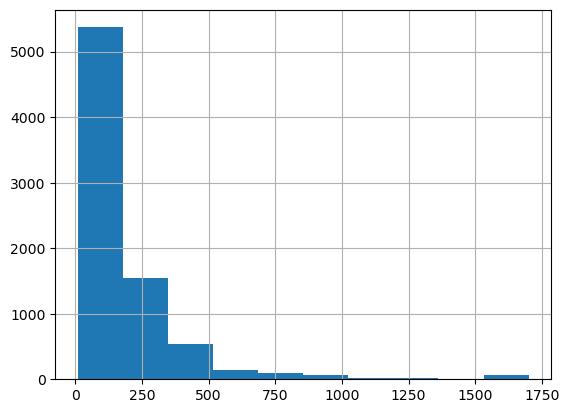

In [48]:
%matplotlib inline
listings["price"].hist()

**b)** What is the average rental price (`price`) of listings in the dataset?

In [49]:
listings["price"].mean()

183.8185288877577

**c)** How many of the listings in the dataset are described with the keyword '*Beautiful*' in their name (`name`)?

**Hint:** Experiment with the *str.contains* method from *pandas.Series*.

In [50]:
# If you extract a column to an object it becomes a series automatically
name_series = listings["name"]
name_series

0                     cosy comfortable Irish cottage twin
1        Victorian House 4 Bed City Centre Ballsbridge D4
2                         Self Catering Barge, Tig Beatha
3       Beautful Apt in Iconic Millenium Tower @ Dockl...
4                     Beautiful House with Garden in City
                              ...                        
7853                      2 single cosy rooms in Ranelagh
7854                      City Centre Apartment, sleeps 2
7855                  Ensuite luxury - Dublin city center
7856                       Great Penthouse In City Centre
7857          Cosy Georgian independent flat in Ranelagh.
Name: name, Length: 7858, dtype: object

In [51]:
# 213 contain "Beautiful". It is converted to binary when using str.contains(), 0 1, get the sum of these
sum(name_series.str.contains("Beautiful"))

213

In [52]:
# There is also 39 listings with "beautiful"
sum(name_series.str.contains("beautiful"))

39

In [53]:
# These are the indices, but we don't need them
indices = name_series.index[name_series.str.contains("Beautiful")]
indices

Index([   4,   45,   57,   62,   63,   75,   90,  102,  119,  189,
       ...
       7262, 7278, 7449, 7484, 7497, 7529, 7546, 7589, 7687, 7806],
      dtype='int64', length=213)

In [54]:
# These are the indices, but we don't need them
indices = name_series.index[name_series.str.contains("beautiful")]
indices

Index([  24,   94,  281,  479,  590,  668, 1275, 1440, 1755, 1936, 2030, 2047,
       2320, 2519, 2559, 2604, 2681, 2738, 2788, 2790, 3202, 3244, 3328, 4154,
       4242, 4825, 5000, 5070, 5385, 5576, 6223, 6244, 6687, 6701, 7185, 7356,
       7559, 7738, 7802],
      dtype='int64')

**d)** Do listings in '*Dn Laoghaire-Rathdown*' have higher rental prices (per person accommodated (`accommodates`)) than rentals in '*Fingal*'?

**Bonus:** Can you plot a data visualisation to support this conclusion?

In [55]:
# Get price per person
listings["price_per_person"] = listings["price"] / listings["accommodates"]
listings.head()

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id,price_per_person
0,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,Teresa,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,2,NaN,1.0,2.0,"[""Shower gel"", ""Freezer"", ""Private backyard \u...",78.0,44077,39.000000
1,https://www.airbnb.com/rooms/3592153,Victorian House 4 Bed City Centre Ballsbridge D4,Enjoy staying in a large house in the center o...,Our neighbourhood is in one of the best locati...,Conor,t,"Ballsbridge, Dublin, Ireland",Dublin City,53.33219,-6.22718,Entire home/apt,8,NaN,4.0,4.0,"[""Luggage dropoff allowed"", ""Private backyard ...",1186.0,3592153,148.250000
2,https://www.airbnb.com/rooms/3604420,"Self Catering Barge, Tig Beatha",Tig Beatha is a self catering cruising barge l...,NaN,Trish,f,NaN,Dublin City,53.34736,-6.22631,Entire home/apt,3,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Indoor firepla...",165.0,3604420,55.000000
3,https://www.airbnb.com/rooms/3604440,Beautful Apt in Iconic Millenium Tower @ Dockl...,"This is a beautiful, bright, airy and spacious...",The Apt is located right in the heart of Dubli...,Kieran,t,"Ringsend, Dublin, Ireland",Dublin City,53.34407,-6.23630,Entire home/apt,6,NaN,3.0,3.0,"[""Hair dryer"", ""Refrigerator"", ""First aid kit""...",1219.0,3604440,203.166667
4,https://www.airbnb.com/rooms/3622736,Beautiful House with Garden in City,Charming family house with beautiful garden on...,NaN,Katie,f,NaN,Dublin City,53.33605,-6.27914,Entire home/apt,4,NaN,3.0,3.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Free...",190.0,3622736,47.500000


In [56]:
listings_dunlaoghaire = listings[listings["neighbourhood_cleansed"] == 'Dn Laoghaire-Rathdown']
listings_dunlaoghaire.head()

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id,price_per_person
0,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,Teresa,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,2,NaN,1.0,2.0,"[""Shower gel"", ""Freezer"", ""Private backyard \u...",78.0,44077,39.0
9,https://www.airbnb.com/rooms/3698469,"Killiney,Dublin-Period Villa-Private Room 2 of 2",Beautiful private bedroom(+shared Guest bathro...,Our period home is located in a quiet neighbou...,Anthony,t,"Killiney, Dublin, Ireland",Dn Laoghaire-Rathdown,53.24678,-6.12062,Private room,2,NaN,1.0,1.0,"[""Shower gel"", ""Luggage dropoff allowed"", ""Hai...",96.0,3698469,48.0
12,https://www.airbnb.com/rooms/3725793,Double Room in Spacious House,This lovely home beside the university (UCD) i...,NaN,Teresa,f,NaN,Dn Laoghaire-Rathdown,53.30893,-6.24091,Private room,2,NaN,1.0,2.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Free...",41.0,3725793,20.5
16,https://www.airbnb.com/rooms/3741699,Great Double/Twin in Lovely House,This lovely home beside the university (UCD) i...,NaN,Teresa,f,NaN,Dn Laoghaire-Rathdown,53.30939,-6.24007,Private room,2,NaN,1.0,2.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Free...",39.0,3741699,19.5
18,https://www.airbnb.com/rooms/3749697,Single Room in Dalkey home,"Dalkey , 25 minuites from city by Dart, a her...",A feeling of country with all the city perks.D...,Annmarie,f,"Dalkey, Dublin, Ireland",Dn Laoghaire-Rathdown,53.27200,-6.11282,Private room,1,NaN,1.0,NaN,"[""Luggage dropoff allowed"", ""Private backyard ...",60.0,3749697,60.0


In [57]:
# Average price per person in Dn Laoghaire-Rathdown
listings_dunlaoghaire["price_per_person"].mean()

50.887766158108136

In [58]:
listings_fingal = listings[listings["neighbourhood_cleansed"] == 'Fingal']
listings_fingal.head()

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id,price_per_person
33,https://www.airbnb.com/rooms/3951360,Relaxing Beachside Room,"""Almu"" <br />A tranquil haven in a quiet villa...",NaN,Isobel,f,NaN,Fingal,53.519320,-6.103970,Private room,4,NaN,1.0,3.0,"[""Luggage dropoff allowed"", ""Hair dryer"", ""Ref...",117.0,3951360,29.250000
34,https://www.airbnb.com/rooms/3965249,"Beachside room, close to airport!","""Almu"" <br />A tranquil haven in a quiet villa...",We love being so close to the magnificent sand...,Isobel,f,"Rush, County Dublin, Ireland",Fingal,53.518681,-6.102857,Private room,4,NaN,1.0,2.0,"[""Luggage dropoff allowed"", ""Hair dryer"", ""Ref...",117.0,3965249,29.250000
66,https://www.airbnb.com/rooms/4394037,House in Howth,"Modern, roomy apartment overlooking Howth vill...",Howth is a beautiful fishing village on the no...,T K,f,"Dublin 13, County Dublin, Ireland",Fingal,53.379470,-6.066280,Entire home/apt,6,NaN,3.0,3.0,"[""Kitchen"", ""Wifi"", ""Host greets you"", ""Heatin...",190.0,4394037,31.666667
76,https://www.airbnb.com/rooms/4604580,Bungalow 1. Twin Beds €90 per night Breakfast ...,We live in a quiet and peaceful area in Dublin...,Our neighbourhood comprises detached bungalows...,Conor And Ann,t,"Sutton, Dublin 13, Ireland",Fingal,53.382680,-6.094210,Private room,2,NaN,1.0,2.0,"[""Luggage dropoff allowed"", ""Hair dryer"", ""Ref...",90.0,4604580,45.000000
93,https://www.airbnb.com/rooms/4857684,Unique exquisite beachfront property 2,This is a very unique property on the beach fr...,Rush was a small fishing village & is now a bu...,Mary & Jason,t,"Rush, Co. Dublin, Ireland",Fingal,53.527340,-6.086560,Entire home/apt,6,NaN,2.0,4.0,"[""Shower gel"", ""Luggage dropoff allowed"", ""Cof...",155.0,4857684,25.833333


In [59]:
# Average price per person in Dn Laoghaire-Rathdown
listings_fingal["price_per_person"].mean()

48.782803072018766

The difference in mean is not much between Dn L and Fingal, but means can be skewed by outliers, good idea to look at range, quartiles, median. For this a boxplot is a good idea. Looking at the box plot below, we can verify there is no difference between the 2 in terms of pricing per person.

Text(0, 0.5, 'Price per person')

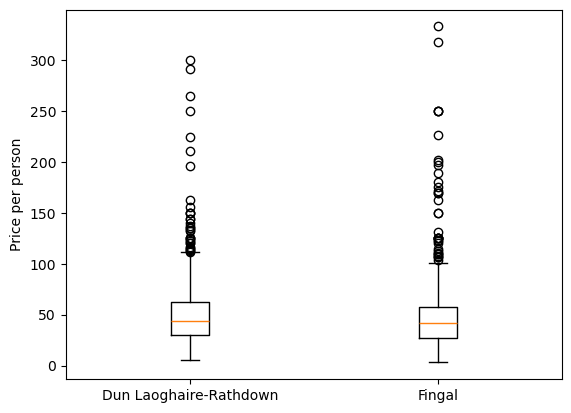

In [60]:
plt.boxplot([listings_dunlaoghaire["price_per_person"], listings_fingal["price_per_person"]], 
            labels=["Dun Laoghaire-Rathdown", "Fingal"])
plt.ylabel("Price per person")

**e)** Which host owns properties with the highest cumulative rental price?

In [61]:
listings.head()

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id,price_per_person
0,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,Teresa,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,2,NaN,1.0,2.0,"[""Shower gel"", ""Freezer"", ""Private backyard \u...",78.0,44077,39.000000
1,https://www.airbnb.com/rooms/3592153,Victorian House 4 Bed City Centre Ballsbridge D4,Enjoy staying in a large house in the center o...,Our neighbourhood is in one of the best locati...,Conor,t,"Ballsbridge, Dublin, Ireland",Dublin City,53.33219,-6.22718,Entire home/apt,8,NaN,4.0,4.0,"[""Luggage dropoff allowed"", ""Private backyard ...",1186.0,3592153,148.250000
2,https://www.airbnb.com/rooms/3604420,"Self Catering Barge, Tig Beatha",Tig Beatha is a self catering cruising barge l...,NaN,Trish,f,NaN,Dublin City,53.34736,-6.22631,Entire home/apt,3,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Indoor firepla...",165.0,3604420,55.000000
3,https://www.airbnb.com/rooms/3604440,Beautful Apt in Iconic Millenium Tower @ Dockl...,"This is a beautiful, bright, airy and spacious...",The Apt is located right in the heart of Dubli...,Kieran,t,"Ringsend, Dublin, Ireland",Dublin City,53.34407,-6.23630,Entire home/apt,6,NaN,3.0,3.0,"[""Hair dryer"", ""Refrigerator"", ""First aid kit""...",1219.0,3604440,203.166667
4,https://www.airbnb.com/rooms/3622736,Beautiful House with Garden in City,Charming family house with beautiful garden on...,NaN,Katie,f,NaN,Dublin City,53.33605,-6.27914,Entire home/apt,4,NaN,3.0,3.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Free...",190.0,3622736,47.500000


In [62]:
# Cumulative rental price = (number of listings)*(rental price). PER HOST
# host[i] = 

# Host series
host_df = pd.DataFrame(list(unique_host_names), columns = ["Host"])
host_df["Cumulative Rental Price"] = 0
host_df

,Host,Cumulative Rental Price
0,Nenad,0
1,Susan,0
2,Aleida,0
3,Carl,0
4,Ciaran & Eva,0
...,...,...
2394,Shiraz,0
2395,Anuroop,0
2396,Pooja & Ajit,0
2397,Nausherwan,0


In [63]:
cum_prices_list = []
cum_prices_dict = {}

for name in unique_host_names:
    # need to do nested for loop
    for i in listings["host_name"]:
        if i == name:
            temp_df = listings[listings["host_name"] == i]
            cum_prices_list.append(temp_df["price"].sum())
            
            cum_prices_dict[name] = temp_df["price"].sum()
            

cum_prices_dict       
        
  
    

{'Nenad': 90.0,
 'Susan': 3762.0,
 'Aleida': 100.0,
 'Carl': 821.0,
 'Ciaran & Eva': 150.0,
 'Brigitte': 126.0,
 'Austin': 65.0,
 'Naama': 75.0,
 'Jessica': 1126.0,
 'Carolina': 556.0,
 'Ludovico': 214.0,
 'Shweyee': 35.0,
 'Melinda': 214.0,
 'Monique': 22.0,
 'Eliaxnis': 83.0,
 'Shumei(淑梅)': 122.0,
 'Yirang': 166.0,
 'Bahadir': 153.0,
 'Hanane': 60.0,
 'Christos': 220.0,
 'Oisin': 495.0,
 'Gauthier': 85.0,
 'Stefi And Laurent': 50.0,
 'Carolinne': 29.0,
 'Alan & John': 170.0,
 'Moris': 50.0,
 'Deerpark Lodge': 707.0,
 'Moyo': 38.0,
 'Freddy': 55.0,
 'Zoran': 45.0,
 'Ronie': 200.0,
 'Merrion': 150.0,
 'Graham_and_Nora': 300.0,
 'Eren': 50.0,
 'Raphline': 200.0,
 'Laure': 60.0,
 'Kerri': 249.0,
 'Cearuil': 70.0,
 'Cynthia': 1609.0,
 'Damla': 354.0,
 'Svenja': 120.0,
 'Giustina': 400.0,
 'Titilde': 80.0,
 'Kamil': 67.0,
 'Patricia': 4091.0,
 'Tadhg': 30.0,
 'Francy': 35.0,
 'Barrai': 300.0,
 'Alana': 656.0,
 'Phillip': 149.0,
 'Natalie': 1440.0,
 'Ronke': 51.0,
 'Zach': 55.0,
 'D&G': 578

In [83]:
# Verification
Carl_df = listings[listings["host_name"] == "Carl"]
Carl_df



,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id,price_per_person
2556,https://www.airbnb.com/rooms/22862626,Modern House in Dublin - Perfect for Pope Visit,"Modern city home in Cabra, Dublin. Perfectly s...",NaN,Carl,f,NaN,Dublin City,53.363800,-6.285040,Entire home/apt,4,NaN,2.0,2.0,"[""Kitchen"", ""Wifi"", ""Host greets you"", ""Heatin...",335.0,22862626,83.75
3266,https://www.airbnb.com/rooms/27624736,Bright Apartment in the Heart of Temple Bar,"This bright, modern apartment spaciously sprea...",The area is in Temple Bar which is famous for ...,Carl,f,"Dublin 2, County Dublin, Ireland",Dublin City,53.345420,-6.266740,Entire home/apt,5,NaN,2.0,2.0,"[""Kitchen"", ""Wifi"", ""Elevator"", ""Heating"", ""Wa...",180.0,27624736,36.00
3397,https://www.airbnb.com/rooms/28357164,"ARTFUL HOME 15 minutes to Airport & City, 2 beds",Bright double room in an artists home. <br />O...,Glasnevin Cemetery and Museum is close by as i...,Carl,f,"Dublin 11, County Dublin, Ireland",Dublin City,53.385290,-6.272700,Private room,2,NaN,1.0,2.0,"[""Hair dryer"", ""Refrigerator"", ""Wifi"", ""Microw...",34.0,28357164,17.00
3408,https://www.airbnb.com/rooms/28462630,ARTFUL HOUSE 15 minutes from airport & city by...,Bright double room in an artists home. <br />O...,Glasnevin Cemetery and Museum is just few minu...,Carl,f,"Glasnevin, County Dublin, Ireland",Dublin City,53.384940,-6.270930,Private room,2,NaN,1.0,1.0,"[""Hair dryer"", ""Refrigerator"", ""Wifi"", ""Microw...",34.0,28462630,17.00
7545,https://www.airbnb.com/rooms/839910454261281616,Guinness room for 2 st Patricks,"A salacious double room and private bathroom, ...",NaN,Carl,f,NaN,Dublin City,53.339187,-6.289027,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Wifi""]",238.0,839910454261281616,119.00


In [82]:
# Verification
Susan_df = listings[listings["host_name"] == "Susan"]
Susan_df

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id,price_per_person
59,https://www.airbnb.com/rooms/4337495,Cottage near city centre - Ranelagh,"Charming two bed cottage, recently refurbished...",Bustling and trendy neighbourhood. Ranelagh is...,Susan,f,"Ranelagh, Dublin, Ireland",Dublin City,53.32982,-6.25938,Entire home/apt,4,NaN,2.0,2.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Indoor firepla...",107.0,4337495,26.750000
400,https://www.airbnb.com/rooms/7625212,"Double bed , beside dublin airport",Situated 10 minutes from Dublin Airport 5 minu...,Neighbourhood is very safe. The house is situ...,Susan,t,"Dublin, Swords, Ireland",Fingal,53.45547,-6.23173,Private room,2,NaN,1.0,1.0,"[""Freezer"", ""Luggage dropoff allowed"", ""Privat...",73.0,7625212,36.500000
756,https://www.airbnb.com/rooms/11278756,Camden Row Period Hse (1 double bedroom) BnB only,A bright contemporary period home just a 5 min...,Camden Row is adjacent to the vibrant and tren...,Susan,t,"Dublin, Ireland",Dublin City,53.33716,-6.26883,Private room,2,NaN,1.0,1.0,"[""Shower gel"", ""Wifi"", ""Host greets you"", ""Hea...",130.0,11278756,65.000000
945,https://www.airbnb.com/rooms/12778275,Cosy contemporary single room .,"Single room in bright home, on a quiet, reside...",NaN,Susan,f,NaN,Dublin City,53.38367,-6.22007,Private room,1,NaN,1.0,1.0,"[""Wifi"", ""Microwave"", ""Heating"", ""Free parking...",59.0,12778275,59.000000
1156,https://www.airbnb.com/rooms/13796842,"Cosy, contemporary home in Dublin.","My place is close to Dublin City Centre, Artan...",NaN,Susan,f,NaN,Dublin City,53.38399,-6.21798,Private room,2,NaN,1.0,2.0,"[""Wifi"", ""Host greets you"", ""Heating"", ""Free p...",71.0,13796842,35.500000
1868,https://www.airbnb.com/rooms/18804967,"Spacious cottage ,donnybrook,dublin 4",My home is a recently renovated 2 bedroom cot...,Number 31 is situated in an enclave of cottage...,Susan,f,"Donnybrook, County Dublin, Ireland",Dublin City,53.32269,-6.23521,Entire home/apt,2,NaN,2.0,2.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Free...",120.0,18804967,60.000000
1923,https://www.airbnb.com/rooms/19091994,SINGLE 15 min DUBLIN AIRPORT/CITY Croke Park/DCU,Cosy single room incl kettle <br />FREE select...,We are an old established area beside Drumcond...,Susan,f,"Whitehall, County Dublin, Ireland",Dublin City,53.38081,-6.24482,Private room,1,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Security cameras on prope...",52.0,19091994,52.000000
2104,https://www.airbnb.com/rooms/20009075,"Beautiful red brick 5 bed family home, Sandymount","Bright, spacious red brick family home, minute...",We love living in Sandymount for its unique vi...,Susan,f,"Ballsbridge, County Dublin, Ireland",Dublin City,53.33118,-6.22202,Entire home/apt,8,NaN,5.0,5.0,"[""Hair dryer"", ""First aid kit"", ""Children\u201...",350.0,20009075,43.750000
2513,https://www.airbnb.com/rooms/22530960,Dublin home 4 bed with amenities all around,"Our house is tiled with Spanish Marble, it has...",Quiet with community feel,Susan,f,"Dublin 16, County Dublin, Ireland",Dn Laoghaire-Rathdown,53.27406,-6.25243,Entire home/apt,6,NaN,4.0,4.0,"[""Kitchen"", ""Luggage dropoff allowed"", ""Host g...",200.0,22530960,33.333333
2601,https://www.airbnb.com/rooms/23116032,Self contained apartment close to Dublin City,Welcome to Chapelizod! This gorgeous property ...,Chapelizod is a quiet village on the banks of ...,Susan,f,"Chapelizod, County Dublin, Ireland",Dublin City,53.34664,-6.34622,Private room,3,NaN,2.0,2.0,"[""Wifi"", ""Heating"", ""Lockbox"", ""Smoke alarm"", ...",75.0,23116032,25.000000


In [84]:
Carl_df["price"].sum()

821.0

In [85]:
Susan_df["price"].sum()

3762.0

In [86]:
# Now lets find the max
max_key = max(cum_prices_dict, key = cum_prices_dict.get)
max_value = cum_prices_dict[max_key]
print(max_key, max_value)

# This is the host with most cumulative price

STK Homes 103620.0


### Question 5: Merging Data

**a)** What is the average value review score (`review_score_value`) in each of the four official neighbourhoods (`neighbourhood_cleansed`)?

In [70]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,review_score_rating,review_scores_accuracy,review_score_cleanliness,review_score_checkin,review_score_communication,review_score_location,review_score_value,comments
0,44077,203703,2011-03-20,393348,Christian,4.0,5.0,5.0,5.0,4.0,5.0,5.0,We enjoyed our stay very much. The room was co...
1,44077,211369,2011-03-28,444004,Solidea,4.0,4.0,4.0,5.0,4.0,3.0,5.0,We have been here 4 nights. Stay in a home is ...
2,44077,234215,2011-04-21,465058,Michael And Isabelle,4.0,4.0,5.0,4.0,4.0,4.0,4.0,Teresa and Hughie were great hosts. They were ...
3,44077,261843,2011-05-13,490005,Weston,5.0,4.0,4.0,4.0,5.0,5.0,5.0,"No surprises, was as described. Very gracious..."
4,44077,268148,2011-05-17,520460,Barbara,5.0,5.0,4.0,4.0,5.0,5.0,4.0,"Teresa was a lovely hostess, and we had a deli..."


In [71]:
listings.head()

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id,price_per_person
0,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,Teresa,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,2,NaN,1.0,2.0,"[""Shower gel"", ""Freezer"", ""Private backyard \u...",78.0,44077,39.000000
1,https://www.airbnb.com/rooms/3592153,Victorian House 4 Bed City Centre Ballsbridge D4,Enjoy staying in a large house in the center o...,Our neighbourhood is in one of the best locati...,Conor,t,"Ballsbridge, Dublin, Ireland",Dublin City,53.33219,-6.22718,Entire home/apt,8,NaN,4.0,4.0,"[""Luggage dropoff allowed"", ""Private backyard ...",1186.0,3592153,148.250000
2,https://www.airbnb.com/rooms/3604420,"Self Catering Barge, Tig Beatha",Tig Beatha is a self catering cruising barge l...,NaN,Trish,f,NaN,Dublin City,53.34736,-6.22631,Entire home/apt,3,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Indoor firepla...",165.0,3604420,55.000000
3,https://www.airbnb.com/rooms/3604440,Beautful Apt in Iconic Millenium Tower @ Dockl...,"This is a beautiful, bright, airy and spacious...",The Apt is located right in the heart of Dubli...,Kieran,t,"Ringsend, Dublin, Ireland",Dublin City,53.34407,-6.23630,Entire home/apt,6,NaN,3.0,3.0,"[""Hair dryer"", ""Refrigerator"", ""First aid kit""...",1219.0,3604440,203.166667
4,https://www.airbnb.com/rooms/3622736,Beautiful House with Garden in City,Charming family house with beautiful garden on...,NaN,Katie,f,NaN,Dublin City,53.33605,-6.27914,Entire home/apt,4,NaN,3.0,3.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Free...",190.0,3622736,47.500000


In [72]:
id_neighbourhood = listings[["id", "neighbourhood_cleansed"]]
id_neighbourhood

,id,neighbourhood_cleansed
0,44077,Dn Laoghaire-Rathdown
1,3592153,Dublin City
2,3604420,Dublin City
3,3604440,Dublin City
4,3622736,Dublin City
...,...,...
7853,2026810,Dublin City
7854,2069629,Dublin City
7855,2084913,Dublin City
7856,2121887,Dublin City


In [73]:
# I want to add neighbourhood column for the correct listings (same listings_id) then I can conditionally get the average scores

id_list =list(listings["id"])
id_list

# Make new column
reviews["neighbourhood_cleansed"] = None

reviews.head()         

,listing_id,id,date,reviewer_id,reviewer_name,review_score_rating,review_scores_accuracy,review_score_cleanliness,review_score_checkin,review_score_communication,review_score_location,review_score_value,comments,neighbourhood_cleansed
0,44077,203703,2011-03-20,393348,Christian,4.0,5.0,5.0,5.0,4.0,5.0,5.0,We enjoyed our stay very much. The room was co...,None
1,44077,211369,2011-03-28,444004,Solidea,4.0,4.0,4.0,5.0,4.0,3.0,5.0,We have been here 4 nights. Stay in a home is ...,None
2,44077,234215,2011-04-21,465058,Michael And Isabelle,4.0,4.0,5.0,4.0,4.0,4.0,4.0,Teresa and Hughie were great hosts. They were ...,None
3,44077,261843,2011-05-13,490005,Weston,5.0,4.0,4.0,4.0,5.0,5.0,5.0,"No surprises, was as described. Very gracious...",None
4,44077,268148,2011-05-17,520460,Barbara,5.0,5.0,4.0,4.0,5.0,5.0,4.0,"Teresa was a lovely hostess, and we had a deli...",None


In [74]:
#id_neighbourhood_dict = {}

# This takes a while

for i in id_list:
    for z in reviews["listing_id"]:
        if i == z:
            temp_df = listings[listings["id"] == i]
            temp_neighbourhood = temp_df.iloc[0, 7]
            reviews.loc[reviews["listing_id"] == i, "neighbourhood_cleansed"] = temp_neighbourhood
            
reviews.head()
            
            
            
            
            
            #id_neighbourhood_dict[i] = temp_neighbourhood
            
#id_neighbourhood_dict
            
            
            #temp_df = reviews[reviews["listing_id"] == i]
            #temp_df

,listing_id,id,date,reviewer_id,reviewer_name,review_score_rating,review_scores_accuracy,review_score_cleanliness,review_score_checkin,review_score_communication,review_score_location,review_score_value,comments,neighbourhood_cleansed
0,44077,203703,2011-03-20,393348,Christian,4.0,5.0,5.0,5.0,4.0,5.0,5.0,We enjoyed our stay very much. The room was co...,Dn Laoghaire-Rathdown
1,44077,211369,2011-03-28,444004,Solidea,4.0,4.0,4.0,5.0,4.0,3.0,5.0,We have been here 4 nights. Stay in a home is ...,Dn Laoghaire-Rathdown
2,44077,234215,2011-04-21,465058,Michael And Isabelle,4.0,4.0,5.0,4.0,4.0,4.0,4.0,Teresa and Hughie were great hosts. They were ...,Dn Laoghaire-Rathdown
3,44077,261843,2011-05-13,490005,Weston,5.0,4.0,4.0,4.0,5.0,5.0,5.0,"No surprises, was as described. Very gracious...",Dn Laoghaire-Rathdown
4,44077,268148,2011-05-17,520460,Barbara,5.0,5.0,4.0,4.0,5.0,5.0,4.0,"Teresa was a lovely hostess, and we had a deli...",Dn Laoghaire-Rathdown


In [75]:
# Manual Test/Verification
# id: 44077

reviews["listing_id"]

# This just gets element, no index, good.
#for i in reviews["listing_id"]:
#    print(i)

# Verification
temp_df1 = listings[listings["id"] == 44077]
temp_df1

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id,price_per_person
0,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,Teresa,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,2,NaN,1.0,2.0,"[""Shower gel"", ""Freezer"", ""Private backyard \u...",78.0,44077,39.0


In [87]:
reviews.tail()

,listing_id,id,date,reviewer_id,reviewer_name,review_score_rating,review_scores_accuracy,review_score_cleanliness,review_score_checkin,review_score_communication,review_score_location,review_score_value,comments,neighbourhood_cleansed
251061,2162973,454430030,2019-05-18,87665301,Kerry,5.0,5.0,5.0,5.0,5.0,4.0,4.0,"Once again, Ali and her mom were wonderful hos...",Dublin City
251062,2162973,536629798,2019-09-27,291322795,Terna Erdoo,3.0,5.0,5.0,3.0,5.0,5.0,4.0,This is the place to be,Dublin City
251063,2162973,466397298846467107,2021-10-05,69716084,Lily,5.0,5.0,4.0,5.0,4.0,4.0,5.0,Alis place is absolutely perfect for a stay in...,Dublin City
251064,2162973,527409523280427039,2021-12-28,43619041,Jimmy,3.0,5.0,5.0,5.0,5.0,5.0,4.0,Ali's place could not be better located! It's ...,Dublin City
251065,2162973,667201957406399217,2022-07-09,359871881,Yiğit,5.0,5.0,4.0,5.0,5.0,4.0,5.0,Imagine the best host you can.. Ali is better!...,Dublin City


In [88]:
# Verification
temp_df1 = listings[listings["id"] == 2162973]
temp_df1

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,id,price_per_person
7857,https://www.airbnb.com/rooms/2162973,Cosy Georgian independent flat in Ranelagh.,Colliers House is just off the main street in ...,Ranelagh is a very popular enclave in Dublin t...,Ali,f,"Dublin, Ireland",Dublin City,53.32147,-6.24967,Entire home/apt,2,NaN,1.0,1.0,"[""Shower gel"", ""Luggage dropoff allowed"", ""Pri...",125.0,2162973,62.5


In [90]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,review_score_rating,review_scores_accuracy,review_score_cleanliness,review_score_checkin,review_score_communication,review_score_location,review_score_value,comments,neighbourhood_cleansed
0,44077,203703,2011-03-20,393348,Christian,4.0,5.0,5.0,5.0,4.0,5.0,5.0,We enjoyed our stay very much. The room was co...,Dn Laoghaire-Rathdown
1,44077,211369,2011-03-28,444004,Solidea,4.0,4.0,4.0,5.0,4.0,3.0,5.0,We have been here 4 nights. Stay in a home is ...,Dn Laoghaire-Rathdown
2,44077,234215,2011-04-21,465058,Michael And Isabelle,4.0,4.0,5.0,4.0,4.0,4.0,4.0,Teresa and Hughie were great hosts. They were ...,Dn Laoghaire-Rathdown
3,44077,261843,2011-05-13,490005,Weston,5.0,4.0,4.0,4.0,5.0,5.0,5.0,"No surprises, was as described. Very gracious...",Dn Laoghaire-Rathdown
4,44077,268148,2011-05-17,520460,Barbara,5.0,5.0,4.0,4.0,5.0,5.0,4.0,"Teresa was a lovely hostess, and we had a deli...",Dn Laoghaire-Rathdown


In [94]:
avg_reviews_dict = {}

# neighbourhood_set this is from previous question

for i in neighbourhood_set:
    temp_df = reviews[reviews["neighbourhood_cleansed"] == i]
    avg_reviews_dict[i] = temp_df["review_score_value"].mean()
        
avg_reviews_dict

{'Dublin City': 4.408219746415308,
 'Dn Laoghaire-Rathdown': 4.493970966986654,
 'Fingal': 4.498649032992036,
 'South Dublin': 3.1412074554294978}